# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [235]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [236]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [237]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 86.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 37.2MB/s]


In [238]:
data = pd.read_csv('./train.csv')

In [239]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

   ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   
5            25            19.80      475.2  Female                0   
6            27            90.15     2423.4  Female                0   
7             1            45.70       45.7    Male                0   
8            50           105.95     5341.8    Male                0   
9            72            61.20    4390.25    Male                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No

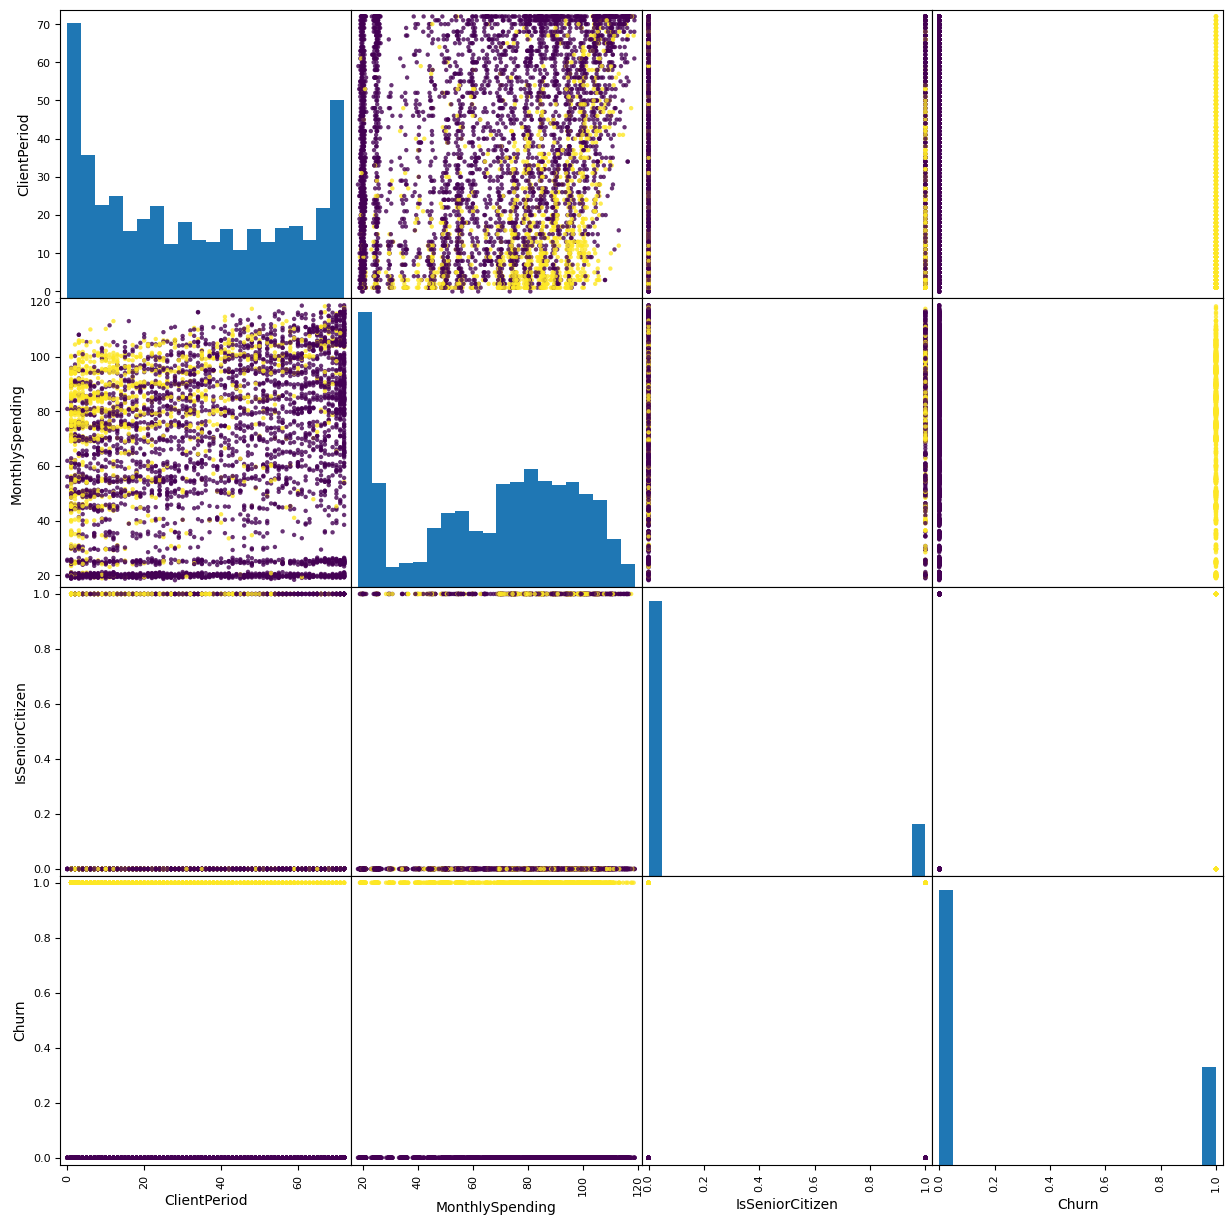

In [240]:
print(data.head(10))   # смотрим какие у нас значения в таблице визуально

data.shape  # size (5282, 20)

data['Churn'].value_counts()  #0 - 3898 клиентов остается; 1 - 1384 клиентов уйдут

data.isna().mean()  # посмотрим на нулевые значения - отсутствуют

# for col in cat_cols:   # все категориальные признаки имеют два и более значений
#     print(f"{col} DISTRIBUTION")
#     print(data[col].value_counts())
#     print()

#data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))

#data.corr().style.background_gradient(cmap='coolwarm').set_precision(2) # кореляция слабая


pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',  # явных зависимостей нет
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

object


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

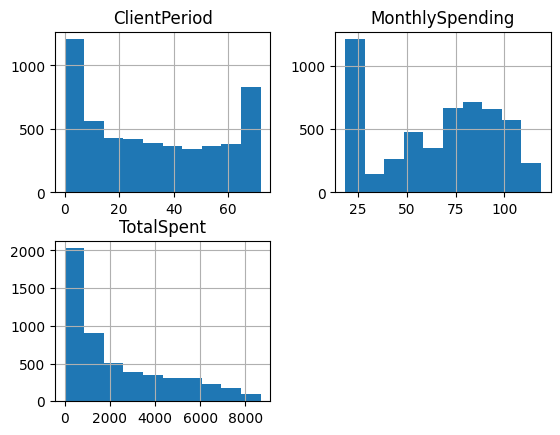

In [241]:
#data.hist(column=num_cols)  # что-то не так с колонкой TotalSpent, исправляем

print(data['TotalSpent'].dtypes)  # cмотрим тип, он object
#data.loc[1048]
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce') # заменяем значения на флоат для построения гистрограммы
data.isnull().mean() #теперь у нас есть Nan
data['TotalSpent'] = data['TotalSpent'].fillna(0) #заменяем Nan-ы на нули
data.isnull().mean() # проверяем
data.hist(column=num_cols) #буц, построились все гистограммы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [242]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [243]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, roc_curve

In [244]:

# data = pd.get_dummies(data, columns=cat_cols)

# cat_cols_new = []
# for col_name in cat_cols:
#     cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
# cat_cols = cat_cols_new

# pca = StandardScaler()
# pca.fit(data[num_cols + cat_cols])
# # Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
# X = pca.transform(data[num_cols + cat_cols])

# # Или есть более простой способ
# X = pca.fit_transform(data[num_cols + cat_cols])


# # Задание: Загуглите как работает эта функция и поделите выборку на две части
#X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)


# lr = LogisticRegressionCV()
# lr.fit(X_train, y_train)

# print(roc_auc_score(lr.predict(X_test), y_test))  # 0.73693134275774

# data.head()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

0:	learn: 0.6569297	total: 11.8ms	remaining: 1.17s
1:	learn: 0.6257979	total: 19.8ms	remaining: 972ms
2:	learn: 0.5985790	total: 33ms	remaining: 1.06s
3:	learn: 0.5762321	total: 44.8ms	remaining: 1.07s
4:	learn: 0.5586198	total: 56.8ms	remaining: 1.08s
5:	learn: 0.5425366	total: 70.2ms	remaining: 1.1s
6:	learn: 0.5275584	total: 81.2ms	remaining: 1.08s
7:	learn: 0.5150925	total: 90.1ms	remaining: 1.04s
8:	learn: 0.5033562	total: 103ms	remaining: 1.04s
9:	learn: 0.4918294	total: 115ms	remaining: 1.03s
10:	learn: 0.4822898	total: 127ms	remaining: 1.03s
11:	learn: 0.4740889	total: 140ms	remaining: 1.03s
12:	learn: 0.4668993	total: 153ms	remaining: 1.02s
13:	learn: 0.4602737	total: 165ms	remaining: 1.02s
14:	learn: 0.4547540	total: 178ms	remaining: 1.01s
15:	learn: 0.4496012	total: 189ms	remaining: 995ms
16:	learn: 0.4454879	total: 209ms	remaining: 1.02s
17:	learn: 0.4416417	total: 223ms	remaining: 1.01s
18:	learn: 0.4383874	total: 229ms	remaining: 977ms
19:	learn: 0.4344557	total: 238ms	re

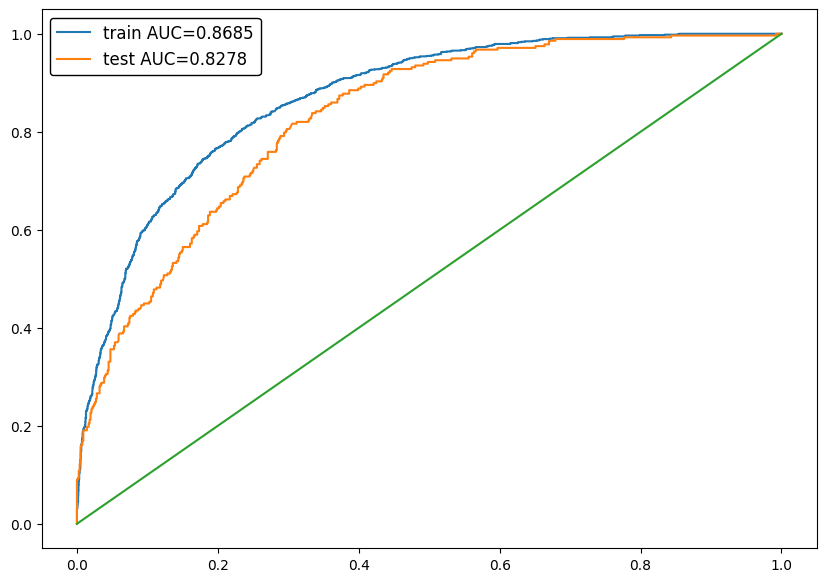

In [245]:
#pip install catboost
import catboost

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

categorical_indices = []
for col in cat_cols:
  categorical_indices.append(data.columns.get_loc(col))


X_train_origin, X_test_origin, _, _ = train_test_split(data[feature_cols].values, data[target_col].values,
                                                       train_size=0.8,
                                                       random_state=42)
# Создание и обучение модели с указанием категориальных признаков

boosting_model = catboost.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

boosting_model.fit(X_train_origin, y_train, cat_features=categorical_indices)
None
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]



train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'train_auc{train_auc}, test_auc {test_auc}')


plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [246]:
best_model = boosting_model


In [247]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test.isna().mean()

X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors = 'coerce')
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(0)

best_model.predict_proba(X_test)

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.